In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
cd /kaggle/working/

/kaggle/working


In [6]:
pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
!mkdir -p Handwriting

In [8]:
cd /kaggle/working/Handwriting/

/kaggle/working/Handwriting


In [22]:
!mkdir -p data notebooks src models outputs checkpoints configs 

In [9]:
!mkdir -p src/utils 

In [10]:
!touch README.md requirements.txt main.py

In [11]:
%%writefile requirements.txt

torch>=2.0
torchvision
numpy
pillow
tqdm
pyyaml
editdistance
python-Levenshtein   # optional, faster for WER/CER
scikit-learn         # for train/test split helpers if needed


Overwriting requirements.txt


In [12]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall:

In [13]:
from datasets import load_dataset

# Load IAM line-level dataset
dataset = load_dataset("Teklia/IAM-line")
print(dataset)


README.md: 0.00B [00:00, ?B/s]

data/train.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

data/validation.parquet:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

data/test.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6482 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/976 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2915 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 6482
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 976
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 2915
    })
})


Text: put down a resolution on the subject


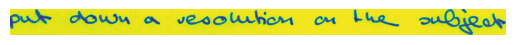

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

sample = dataset['train'][0]
print("Text:", sample['text'])
plt.imshow(sample['image'])
plt.axis('off')
plt.show()


In [15]:
import os

base_dir = "/kaggle/working/Handwriting/iam_dataset"
os.makedirs(base_dir, exist_ok=True)

for split in ["train", "validation", "test"]:
    split_dir = os.path.join(base_dir, split)
    os.makedirs(split_dir, exist_ok=True)
    
    txt_path = os.path.join(split_dir, f"{split}.txt")
    with open(txt_path, "w", encoding="utf-8") as f:
        for i, sample in enumerate(dataset[split]):
            img = sample["image"]
            text = sample["text"].strip()
            img_path = os.path.join(split_dir, f"{split}_{i}.png")
            img.save(img_path)
            f.write(f"{img_path}\t{text}\n")

print("✅ Dataset saved at:", base_dir)


✅ Dataset saved at: /kaggle/working/Handwriting/iam_dataset


In [16]:
%%writefile src/utils/tokenizer.py


import string

class Tokenizer:
    def __init__(self, additional_chars=""):
        # define charset: lowercase letters, digits, punctuation, space
        base = string.ascii_lowercase + string.digits + string.punctuation + " "
        base += additional_chars
        # CTC needs a blank token; we'll index blank as 0
        # So we add characters starting from index 1
        self.chars = sorted(list(set(base)))
        # keep blank at index 0 for CTC
        self.blank_index = 0
        self.idx_to_char = {0: ""}
        next_idx = 1
        for c in self.chars:
            self.idx_to_char[next_idx] = c
            next_idx += 1
        self.char_to_idx = {c: i for i, c in self.idx_to_char.items() if i != 0}
        # create full maps (including blank)
        self.char_to_idx_with_blank = {**{ "": 0 }, **self.char_to_idx}

    def encode(self, text):
        # lower and strip optional
        seq = []
        for ch in text.lower():
            if ch in self.char_to_idx:
                seq.append(self.char_to_idx[ch])
            # else skip unknown chars (could map them to space)
        return seq

    def decode(self, indices):
        # indices are integers from CTC decode raw output
        # collapse repeats and remove blanks(0)
        out = []
        prev = None
        for idx in indices:
            if idx == prev:
                prev = idx
                continue
            if idx != 0:
                out.append(self.idx_to_char.get(idx, ""))
            prev = idx
        return "".join(out)


Writing src/utils/tokenizer.py


In [17]:
%%writefile src/data.py


import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
import torchvision.transforms as T

class IAMLineDataset(Dataset): 
    """
    Expects a transcript file (tab-separated or space-separated) with entries:
    image_path<TAB>transcription
    and the images under a base folder.
    Adapt read_transcripts() to match your IAM transcript format.
    """
    def __init__(self, img_base, transcript_file, tokenizer, img_h=64, transforms=None, max_width=1600):
        self.img_base = img_base
        self.tokenizer = tokenizer
        self.img_h = img_h
        self.max_width = max_width
        self.transforms = transforms
        self.samples = self.read_transcripts(transcript_file)

    def read_transcripts(self, transcript_file):
        samples = []
        with open(transcript_file, "r", encoding="utf-8") as f:
            for line in f:
                line = line.strip()
                if not line: continue
                # Format depends on your transcripts. Common format: <image_relative_path> <transcription>
                # If line contains a tab:
                if "\t" in line:
                    img_rel, trans = line.split("\t", 1)
                else:
                    parts = line.split(" ", 1)
                    if len(parts) < 2:
                        continue
                    img_rel, trans = parts[0], parts[1]
                if os.path.isabs(img_rel):
                    img_path = img_rel
                else:
                    img_path = os.path.join(self.img_base, img_rel)

                if os.path.exists(img_path):
                    samples.append((img_path, trans))
        return samples

    def __len__(self):
        return len(self.samples)

    def load_image(self, path):
        img = Image.open(path).convert("L")  # grayscale
        return img

    def resize_keep_aspect(self, img, target_height):
        w, h = img.size
        new_h = target_height
        new_w = int(w * (new_h / float(h)))
        if new_w > self.max_width:
            new_w = self.max_width
        img = img.resize((new_w, new_h), Image.BILINEAR)
        return img

    def __getitem__(self, idx):
        img_path, transcription = self.samples[idx]
        img = self.load_image(img_path)
        img = self.resize_keep_aspect(img, self.img_h)
        if self.transforms:
            img = self.transforms(img)
        else:
            # default: to tensor and normalize [0,1]
            transform = T.Compose([T.ToTensor(),])  # shape: (1, H, W)
            img = transform(img)
        # encode target
        target = torch.LongTensor(self.tokenizer.encode(transcription))
        return img, target, transcription

def collate_fn(batch):
    """
    batch: list of (img_tensor, target_tensor, transcription)
    For CTC, we need:
      - padded batch images (pad widths)
      - targets concatenated, and target_lengths
      - input_lengths (sequence length produced by CNN/LSTM later) — computed in train loop from model output
    We'll return the raw images padded to same width and the target concatenation/lengths.
    """
    imgs = [b[0] for b in batch]
    targets = [b[1] for b in batch]
    trans = [b[2] for b in batch]
    max_w = max([img.shape[-1] for img in imgs])
    c = imgs[0].shape[0]
    h = imgs[0].shape[1]
    padded = torch.zeros((len(imgs), c, h, max_w), dtype=imgs[0].dtype)
    for i, img in enumerate(imgs):
        padded[i, :, :, :img.shape[-1]] = img
    # concat targets
    target_lengths = torch.tensor([t.shape[0] for t in targets], dtype=torch.long)
    targets_concat = torch.cat(targets) if len(targets) > 0 else torch.LongTensor([])
    return padded, targets_concat, target_lengths, trans


Writing src/data.py


In [18]:
%%writefile src/model.py

import torch
import torch.nn as nn
import torch.nn.functional as F

class CRNN(nn.Module):
    def __init__(self, n_classes, img_h=64, channels=1, lstm_hidden=256, lstm_layers=2):
        super().__init__()
        
        # --- Convolutional Backbone ---
        self.cnn = nn.Sequential(
            nn.Conv2d(channels, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d((2, 2)),  # H/2
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d((2, 2)),        # H/4
            nn.Conv2d(128, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d((2, 1)),       # H/8
            nn.Conv2d(256, 512, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d((2, 1)),       # H/16
            nn.Conv2d(512, 512, kernel_size=2), nn.ReLU()                                        # ~H=1
        )

        # --- RNN Layers ---
        # After CNN, height ≈ 1, so features per time-step = 512
        rnn_input_size = 1536 #512
        self.rnn = nn.LSTM(
            rnn_input_size,
            lstm_hidden,
            num_layers=lstm_layers,
            bidirectional=True,
            batch_first=True
        )
        
        self.fc = nn.Linear(lstm_hidden * 2, n_classes)  # Bidirectional LSTM doubles hidden size
        self.log_softmax = nn.LogSoftmax(dim=2)

    def forward(self, x):
        # x: (B, C, H, W)
        conv = self.cnn(x)                  # (B, C, H', W')
        B, C, H, W = conv.size()
        
        # Collapse height dimension
        conv = conv.permute(0, 3, 1, 2)     # (B, W, C, H)
        conv = conv.reshape(B, W, C * H)    # (B, W, C*H)
        
        # RNN processing
        rnn_out, _ = self.rnn(conv)         # (B, W, hidden*2)
        out = self.fc(rnn_out)              # (B, W, n_classes)
        log_probs = self.log_softmax(out)   # for CTC Loss
        return log_probs


Writing src/model.py


In [19]:
%%writefile src/train.py
import os
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader
import torch.nn as nn
from tqdm import tqdm
import yaml

import sys
# get the current script directory (like /kaggle/working/handwriting_recognition_pipeline/src)
current_dir = os.path.dirname(os.path.abspath(__file__))
# go up one level to reach project root
project_root = os.path.dirname(current_dir)
# add project root to sys.path
sys.path.append(project_root)

from src.data import IAMLineDataset, collate_fn
from src.model import CRNN
from src.utils.tokenizer import Tokenizer
from src.utils.metrics import cer, wer


def train(cfg):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Tokenizer
    tokenizer = Tokenizer()

    # Datasets
    transforms = None
    train_ds = IAMLineDataset(
        cfg["data"]["img_base"], 
        cfg["data"]["train_transcript"], 
        tokenizer, 
        img_h=cfg["data"]["img_h"], 
        transforms=transforms
    )
    val_ds = IAMLineDataset(
        cfg["data"]["img_base"], 
        cfg["data"]["val_transcript"], 
        tokenizer, 
        img_h=cfg["data"]["img_h"], 
        transforms=transforms
    )

    train_loader = DataLoader(train_ds, batch_size=cfg["training"]["batch_size"], shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_ds, batch_size=cfg["training"]["batch_size"], shuffle=False, collate_fn=collate_fn)

    # Model, Optimizer, Scheduler, Loss
    n_classes = len(tokenizer.idx_to_char)
    model = CRNN(n_classes=n_classes, img_h=cfg["data"]["img_h"]).to(device)

    optimizer = Adam(model.parameters(), lr=float(cfg["training"]["lr"]))
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=float(cfg["training"]["lr"]) * 10,  # can adjust multiplier
        steps_per_epoch=len(train_loader),
        epochs=cfg["training"]["epochs"]
    )

    # Proper CTC setup
    blank_token_id = getattr(tokenizer, "blank_token_id", 0)  # fallback to 0 if not defined
    ctc_loss = nn.CTCLoss(blank=blank_token_id, zero_infinity=True)


    # AMP (mixed precision)
    scaler = torch.cuda.amp.GradScaler()

    best_val_cer = float("inf")
    downsample_factor = 4  # adjust if model architecture changes

    for epoch in range(cfg["training"]["epochs"]):
        model.train()
        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{cfg['training']['epochs']} [Train]")
        total_train_loss = 0.0

        for imgs, targets_concat, target_lengths, trans in loop:
            imgs = imgs.to(device)
            targets_concat = targets_concat.to(device)

            optimizer.zero_grad()

            with torch.cuda.amp.autocast():
                log_probs = model(imgs)  # (B, T, C)
                log_probs = torch.nn.functional.log_softmax(log_probs, dim=2)
                B, T, C = log_probs.shape
                input_lengths = torch.full((B,), T, dtype=torch.long)
                log_probs_t = log_probs.permute(1, 0, 2)
                loss = ctc_loss(log_probs_t, targets_concat, input_lengths, target_lengths)

            # Scaled backward
            scaler.scale(loss).backward()

            # Gradient clipping
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()

            total_train_loss += loss.item()
            loop.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        print(f"\nEpoch {epoch+1} | Avg Train Loss: {avg_train_loss:.4f} | LR: {scheduler.get_last_lr()[0]:.6f}")

        # Validation
        model.eval()
        total_cer = 0.0
        total_wer = 0.0
        n_eval = 0
        with torch.no_grad():
            for imgs, targets_concat, target_lengths, trans in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
                imgs = imgs.to(device)
                with torch.cuda.amp.autocast():
                    log_probs = model(imgs)
                    probs = torch.exp(log_probs)
                    preds = probs.argmax(dim=2)

                for i in range(preds.shape[0]):
                    seq = preds[i].cpu().tolist()
                    pred_text = tokenizer.decode(seq)
                    gt_text = trans[i].lower()
                    total_cer += cer(pred_text, gt_text)
                    total_wer += wer(pred_text, gt_text)
                    n_eval += 1

        avg_cer = total_cer / max(1, n_eval)
        avg_wer = total_wer / max(1, n_eval)
        print(f"Epoch {epoch+1} | Val CER: {avg_cer:.4f} | Val WER: {avg_wer:.4f}")

        # Save best checkpoint
        if avg_cer < best_val_cer:
            best_val_cer = avg_cer
            os.makedirs(os.path.dirname(cfg["training"]["checkpoint_path"]), exist_ok=True)
            torch.save(
                {
                    "model_state": model.state_dict(),
                    "tokenizer": tokenizer.__dict__,
                },
                cfg["training"]["checkpoint_path"]
            )
            print(f"✅ Saved best checkpoint at {cfg['training']['checkpoint_path']} (CER={best_val_cer:.4f})")

    print("\nTraining completed successfully ✅")


if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("--config", type=str, required=True)
    args = parser.parse_args()

    with open(args.config) as f:
        cfg = yaml.safe_load(f)

    train(cfg)


Writing src/train.py


In [20]:
%%writefile src/utils/metrics.py


import editdistance

def cer(s1, s2):
    """Character Error Rate"""
    if len(s2) == 0:
        return 0.0 if len(s1) == 0 else 1.0
    dist = editdistance.eval(s1, s2)
    return dist / max(1, len(s2))

def wer(s1, s2):
    """Word Error Rate: tokenizes on whitespace"""
    w1 = s1.split()
    w2 = s2.split()
    if len(w2) == 0:
        return 0.0 if len(w1) == 0 else 1.0
    dist = editdistance.eval(w1, w2)
    return dist / max(1, len(w2))


Writing src/utils/metrics.py


In [23]:
%%writefile configs/default.yaml

data:
  img_base: "/kaggle/working/Handwriting/iam_dataset"
  train_transcript: "/kaggle/working/Handwriting/iam_dataset/train/train.txt"
  val_transcript: "/kaggle/working/Handwriting/iam_dataset/validation/validation.txt"
  img_h: 64


training:
  batch_size: 8
  lr: 1e-4
  epochs: 30
  checkpoint_path: "checkpoints/best.pt"


Writing configs/default.yaml


In [31]:
%%writefile src/utils/beam_search.py

import torch
import numpy as np

def beam_search_decode(log_probs, beam_width=5, blank_idx=0):
    """
    Performs beam search decoding for a batch of CTC outputs.

    Args:
        log_probs: Tensor of shape (T, C) - log probabilities per time step.
        beam_width: Number of beams to keep at each time step.
        blank_idx: Index representing the blank token in CTC.

    Returns:
        Best decoded string indices (list of int).
    """
    T, C = log_probs.shape
    beams = [(tuple(), 0)]  # (sequence, score)

    for t in range(T):
        new_beams = {}
        for seq, score in beams:
            for c in range(C):
                new_seq = seq if c == blank_idx else seq + (c,)
                new_score = score + log_probs[t, c].item()

                if new_seq not in new_beams or new_score > new_beams[new_seq]:
                    new_beams[new_seq] = new_score

        # keep only top-k beams
        beams = sorted(new_beams.items(), key=lambda x: x[1], reverse=True)[:beam_width]

    # best sequence (highest score)
    best_seq, _ = beams[0]

    # collapse repeated characters
    collapsed = []
    prev = None
    for c in best_seq:
        if c != prev and c != blank_idx:
            collapsed.append(c)
        prev = c

    return collapsed


Writing src/utils/beam_search.py


In [29]:
%%writefile src/eval.py

import torch
import argparse
import os
import sys

# get the current script directory (like /kaggle/working/Handwriting/src)
current_dir = os.path.dirname(os.path.abspath(__file__))
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)

from src.data import IAMLineDataset, collate_fn
from src.model import CRNN
from src.utils.tokenizer import Tokenizer
from src.utils.metrics import cer, wer
from src.utils.beam_search import beam_search_decode  # ✅ Added import
from torch.utils.data import DataLoader
from tqdm import tqdm


def evaluate(checkpoint_path, img_base, val_transcript, img_h=64, batch_size=8, beam_width=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load checkpoint
    ckpt = torch.load(checkpoint_path, map_location=device)
    tokenizer = Tokenizer()
    model = CRNN(n_classes=len(tokenizer.idx_to_char), img_h=img_h)
    model.load_state_dict(ckpt["model_state"])
    model = model.to(device)
    model.eval()

    val_ds = IAMLineDataset(img_base, val_transcript, tokenizer, img_h=img_h)
    val_loader = DataLoader(val_ds, batch_size=batch_size, collate_fn=collate_fn)

    total_cer, total_wer = 0.0, 0.0
    n_samples = 0
    exact_matches = 0

    with torch.no_grad():
        for imgs, _, _, texts in tqdm(val_loader, desc=f"Evaluating (Beam width={beam_width})"):
            imgs = imgs.to(device)
            log_probs = model(imgs).cpu()  # shape: (B, T, C)

            preds = []
            for i in range(log_probs.shape[0]):
                seq = beam_search_decode(log_probs[i], beam_width=beam_width)
                preds.append(seq)

            for i in range(len(preds)):
                pred_text = tokenizer.decode(preds[i])
                gt_text = texts[i].lower().strip()

                total_cer += cer(pred_text, gt_text)
                total_wer += wer(pred_text, gt_text)
                n_samples += 1

                if pred_text == gt_text:
                    exact_matches += 1

    print(f"\nAverage CER: {total_cer / n_samples:.4f}")
    print(f"Average WER: {total_wer / n_samples:.4f}")
    print(f"Sequence Accuracy: {exact_matches / n_samples:.4f}")


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--checkpoint", type=str, required=True)
    parser.add_argument("--img_base", type=str, default="/kaggle/working/Handwriting/iam_dataset")
    parser.add_argument("--val_transcript", type=str, default="/kaggle/working/Handwriting/iam_dataset/validation/validation.txt")
    parser.add_argument("--beam_width", type=int, default=5, help="Beam width for beam search decoding")

    args = parser.parse_args()

    evaluate(
        args.checkpoint,
        args.img_base,
        args.val_transcript,
        beam_width=args.beam_width
    )


Overwriting src/eval.py


In [25]:
!python src/train.py --config configs/default.yaml


/kaggle/working/Handwriting/src/train.py:67: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
Epoch 1/30 [Train]:   0%|                               | 0/811 [00:00<?, ?it/s]/kaggle/working/Handwriting/src/train.py:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Epoch 1/30 [Train]: 100%|██

In [28]:
!python src/eval.py --checkpoint checkpoints/best.pt #--beam_width 10


Evaluating: 100%|█████████████████████████████| 122/122 [00:11<00:00, 10.46it/s]
Average CER: 0.0626
Average WER: 0.2265
Sequence Accuracy: 0.2049


In [30]:
!python src/eval.py --checkpoint checkpoints/best.pt --beam_width 10


Traceback (most recent call last):
  File "/kaggle/working/Handwriting/src/eval.py", line 16, in <module>
    from src.utils.beam_search import beam_search_decode  # ✅ Added import
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'src.utils.beam_search'


In [ ]:
!python src/eval.py --checkpoint checkpoints/best.pt --beam_width 5


In [ ]:
!python src/eval.py --checkpoint checkpoints/best.pt --beam_width 15


In [ ]:
from jiwer import wer, cer

preds = ["this is a test", "hello world"]
targets = ["this is test", "hello word"]

print("CER:", cer(targets, preds))
print("WER:", wer(targets, preds))


In [ ]:
# download as zip file
#!zip -r handwriting_repo.zip Handwriting_pipeline


In [ ]:
#after uploading zip file run below to unzip
# !unzip /kaggle/input/HandWriting_001 -d /kaggle/working/
